# Effectuez une prédiction de revenus

## Mission 1
Résumez les données utilisées :
- Année(s) des données utilisées
- Nombre de pays présents
- Population couverte par l'analyse (en termes de pourcentage de la population mondiale)
Les données de la world income distribution présentent pour chaque pays les quantiles de la
distribution des revenus de leur population respective.
- De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
- Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode? Pourquoi ?

## Importation des données et des bibliothèques

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Importation des données
data = pd.read_csv('/Users/teilo/Desktop/OC - Projet 7/predictions_revenus/Données/data-projet7.csv')
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


## Nettoyage des données

In [3]:
data = data.rename(columns= {
    'country': 'Country',
    'year_survey': 'Year',
    'quantile': 'Quantile',
    'income': 'Income',
    'gdpppp': 'GDP'
})
data

,Country,Year,Quantile,nb_quantiles,Income,GDP
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [4]:
data.describe()

,Year,Quantile,nb_quantiles
count,11599.000000,11599.000000,11599.0
mean,2007.982757,50.500819,100.0
std,0.909633,28.868424,0.0
min,2004.000000,1.000000,100.0
25%,2008.000000,25.500000,100.0
50%,2008.000000,51.000000,100.0
75%,2008.000000,75.500000,100.0
max,2011.000000,100.000000,100.0


On remarque que les années prises en compte dans ces données vont de 2004 à 2011. Avec une année moyenne estimé à 2008.

On peut supprimer la colonne 'nb_quantiles' car les données sont toujours 100.

In [5]:
data = data.drop(columns='nb_quantiles')
data

,Country,Year,Quantile,Income,GDP
0,ALB,2008,1,"728,89795",7297
1,ALB,2008,2,"916,66235",7297
2,ALB,2008,3,"1010,916",7297
3,ALB,2008,4,"1086,9078",7297
4,ALB,2008,5,"1132,6997",7297
...,...,...,...,...,...
11594,COD,2008,96,"810,6233","303,19305"
11595,COD,2008,97,"911,7834","303,19305"
11596,COD,2008,98,"1057,8074","303,19305"
11597,COD,2008,99,"1286,6029","303,19305"


In [6]:
mean = data.groupby('Country').mean()
mean

,Year,Quantile
Country,,
ALB,2008.0,50.5
ARG,2008.0,50.5
ARM,2008.0,50.5
AUT,2008.0,50.5
AZE,2008.0,50.5
...,...,...
VEN,2006.0,50.5
VNM,2006.0,50.5
XKX,2008.0,50.5


116 pays sont représentés dans ce jeu de données.

### Correspondance des données avec la population
Nous selectionnons les données de la population de 2008 (année moyenne) afin de pouvoir calculer la proportion de chaque pays sur le total de la population d'une année.

### Calcul de la contribution de chaque pays à la population mondiale

In [7]:
population = pd.read_csv("/Users/teilo/Desktop/OC - Projet 7/predictions_revenus/Données/population1.csv", on_bad_lines='skip')
population = population['Country Name;Country Code;2008;'].str.split(";", n=3, expand=True)
population = population.rename(columns={0:"Name", 1:'Country', 2:'Population'})
population = population.drop(columns=3)
population

,Name,Country,Population
0,Aruba,ABW,101362
1,Africa Eastern and Southern,AFE,491173160
2,Afghanistan,AFG,27722281
3,Africa Western and Central,AFW,331772330
4,Angola,AGO,21695636
...,...,...,...
248,Samoa,WSM,183270
249,Kosovo,XKX,1747383
250,South Africa,ZAF,49779472
251,Zambia,ZMB,12848531


In [8]:
# Assemblement des données issue de la population et du dataframe principale
data = data.merge(population, how='left', on='Country')
data

,Country,Year,Quantile,Income,GDP,Name,Population
0,ALB,2008,1,"728,89795",7297,Albania,2947314
1,ALB,2008,2,"916,66235",7297,Albania,2947314
2,ALB,2008,3,"1010,916",7297,Albania,2947314
3,ALB,2008,4,"1086,9078",7297,Albania,2947314
4,ALB,2008,5,"1132,6997",7297,Albania,2947314
...,...,...,...,...,...,...,...
11594,COD,2008,96,"810,6233","303,19305",NaN,NaN
11595,COD,2008,97,"911,7834","303,19305",NaN,NaN
11596,COD,2008,98,"1057,8074","303,19305",NaN,NaN
11597,COD,2008,99,"1286,6029","303,19305",NaN,NaN


In [9]:
# Ajout des valeurs qui ne se sont pas assemblées
# Congo
data.loc[data['Country'] == 'COD', 'Name'] = 'Congo'
data.loc[data['Country'] == 'COD', 'Population'] = 60411195

# Yemen
data.loc[data['Country'] == 'YEM', 'Name'] = 'Yemen'
data.loc[data['Country'] == 'YEM', 'Population'] = 21892149

# Venezuela
data.loc[data['Country'] == 'VEN', 'Name'] = 'Venezuela'
data.loc[data['Country'] == 'VEN', 'Population'] = 27635827

# Corée
data.loc[data['Country'] == 'KOR', 'Name'] = 'Korea'
data.loc[data['Country'] == 'KOR', 'Population'] = 49054708

# Iran
data.loc[data['Country'] == 'IRN', 'Name'] = 'Iran'
data.loc[data['Country'] == 'IRN', 'Population'] = 72120608

# Egypt
data.loc[data['Country'] == 'EGY', 'Name'] = 'Egypt'
data.loc[data['Country'] == 'EGY', 'Population'] = 79636081

# Source WID

In [10]:
# Suppression de Taiwan compris dans la Chine par les données de la population de World Bank Data
data = data.set_index('Country')
data = data.drop('TWN')
data

,Year,Quantile,Income,GDP,Name,Population
Country,,,,,,
ALB,2008,1,"728,89795",7297,Albania,2947314
ALB,2008,2,"916,66235",7297,Albania,2947314
ALB,2008,3,"1010,916",7297,Albania,2947314
ALB,2008,4,"1086,9078",7297,Albania,2947314
ALB,2008,5,"1132,6997",7297,Albania,2947314
...,...,...,...,...,...,...
COD,2008,96,"810,6233","303,19305",Congo,60411195
COD,2008,97,"911,7834","303,19305",Congo,60411195
COD,2008,98,"1057,8074","303,19305",Congo,60411195


In [11]:
# Vérification des données
null_data = data[data.isnull().any(axis=1)]
null_data = null_data.sort_values('GDP')
print(null_data)

         Year  Quantile     Income  GDP                Name Population
Country                                                               
XKX      2008         1   437,8937  NaN              Kosovo    1747383
XKX      2008         2  508,17133  NaN              Kosovo    1747383
XKX      2008         3   591,8282  NaN              Kosovo    1747383
XKX      2008         4        668  NaN              Kosovo    1747383
XKX      2008         5   730,4022  NaN              Kosovo    1747383
...       ...       ...        ...  ...                 ...        ...
PSE      2009        96  2763,8848  NaN  West Bank and Gaza    3591977
PSE      2009        97  3077,8333  NaN  West Bank and Gaza    3591977
PSE      2009        98  3449,2224  NaN  West Bank and Gaza    3591977
PSE      2009        99   4165,997  NaN  West Bank and Gaza    3591977
PSE      2009       100  6343,8755  NaN  West Bank and Gaza    3591977

[200 rows x 6 columns]


In [12]:
# Données en string donc changement des ',' en '.' pour changer en valeur
data['Income'] = data['Income'].str.replace(',', '.')
data['GDP'] = data['GDP'].str.replace(',', '.')

In [13]:
# Changement des données en valeur int et float.
data['Population'] = data['Population'].astype(int)
data['Income'] = data['Income'].astype(float)
data['GDP'] = data['GDP'].astype(float)
data['Quantile'] = data['Quantile'].astype(int)

In [14]:
# Calcul du % de la population d'un pays par rapport à la population mondiale
# Division par nb_quartiles(100) la somme de la population
pop_total = data['Population'].sum()/100
data['%_pop_total'] = data['Population']/pop_total*100
print(f"""Population du Monde en 2008: {pop_total:,}""")
print(f"""Ces données couvrent {data['%_pop_total'].sum()/100}% de la population mondiale""")

Population du Monde en 2008: 6,180,792,961.69
Ces données couvrent 100.00000000000001% de la population mondiale


#### Réponse à la mission 1
Le type de quantiles utilisité pour cette analyse est le "Centiles" car les données sont divisé en 100 quantiles.

In [15]:
data = data.reset_index()

In [16]:
'''
# Visualisation de la repartition des revenus par pays.
for cat in data["Country"].unique():
    subset = data[data.Country == cat]
    print("NOM :", subset['Name'].iloc[0])
    print("PAYS :",cat)
    print("Moyenne:",subset['Income'].mean())
    print("Medianne:",subset['Income'].median())
    print("Minimal:", subset['Income'].min())
    print("Maximal:", subset['Income'].max())
    print()
    subset["Income"].hist() 
    plt.show() 
    
    '''

'\n# Visualisation de la repartition des revenus par pays.\nfor cat in data["Country"].unique():\n    subset = data[data.Country == cat]\n    print("NOM :", subset[\'Name\'].iloc[0])\n    print("PAYS :",cat)\n    print("Moyenne:",subset[\'Income\'].mean())\n    print("Medianne:",subset[\'Income\'].median())\n    print("Minimal:", subset[\'Income\'].min())\n    print("Maximal:", subset[\'Income\'].max())\n    print()\n    subset["Income"].hist() \n    plt.show() \n    \n    '

Suite à cette analyse on peut voir que l'analyse par centiles est très efficace car elle permet de faire une analyse pointu des données au % de la population près et ainsi constater des différences entre chaque catégorie social de la population.

## Mission 2

Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique.
- Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
- Représentez la courbe de Lorenz de chacun des pays choisis.
- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [17]:
# Calcul du total des revenus ainsi que du ratio de chaque revenu comparé au total + ajout au dataframe.
income_total = (data[['Country', 'Year', 'Income']].groupby(['Country', 'Year']).sum().reset_index())
income_total.rename(columns={'Income':'income_total'}, inplace=True)

data = data.merge(income_total, how='left', on=['Country', 'Year'])
data['income_ratio'] = data.Income / data.income_total

data.head()

,Country,Year,Quantile,Income,GDP,Name,Population,%_pop_total,income_total,income_ratio
0,ALB,2008,1,728.89795,7297.0,Albania,2947314,0.047685,299482.9902,0.002434
1,ALB,2008,2,916.66235,7297.0,Albania,2947314,0.047685,299482.9902,0.003061
2,ALB,2008,3,1010.91600,7297.0,Albania,2947314,0.047685,299482.9902,0.003376
3,ALB,2008,4,1086.90780,7297.0,Albania,2947314,0.047685,299482.9902,0.003629
4,ALB,2008,5,1132.69970,7297.0,Albania,2947314,0.047685,299482.9902,0.003782


In [18]:
# Mise en ordre des colonnes.
data = data[['Name', 'Country', 'Year', 'GDP', 'Population', '%_pop_total', 'Quantile', 'Income', 'income_total', 'income_ratio' ]]
data

,Name,Country,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio
0,Albania,ALB,2008,7297.00000,2947314,0.047685,1,728.89795,299482.990200,0.002434
1,Albania,ALB,2008,7297.00000,2947314,0.047685,2,916.66235,299482.990200,0.003061
2,Albania,ALB,2008,7297.00000,2947314,0.047685,3,1010.91600,299482.990200,0.003376
3,Albania,ALB,2008,7297.00000,2947314,0.047685,4,1086.90780,299482.990200,0.003629
4,Albania,ALB,2008,7297.00000,2947314,0.047685,5,1132.69970,299482.990200,0.003782
...,...,...,...,...,...,...,...,...,...,...
11494,Congo,COD,2008,303.19305,60411195,0.977402,96,810.62330,27601.604415,0.029369
11495,Congo,COD,2008,303.19305,60411195,0.977402,97,911.78340,27601.604415,0.033034
11496,Congo,COD,2008,303.19305,60411195,0.977402,98,1057.80740,27601.604415,0.038324
11497,Congo,COD,2008,303.19305,60411195,0.977402,99,1286.60290,27601.604415,0.046613


### Choix des pays

In [19]:
countries = ['FRA', 'BRA', 'CAN', 'BGD', 'IDN', 'ZAF', 'SVN']
colors = ['b','y','c','m','g','r', 'k']

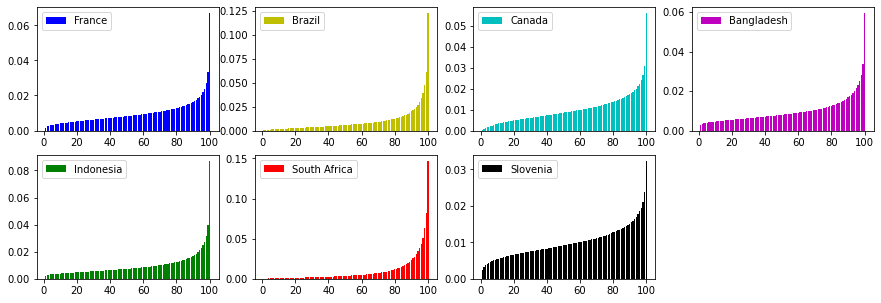

In [20]:
fig = plt.figure(figsize=(15,5))

# Visualisation de la diversités des revenus par rapport au total par quantiles.
for i,x in enumerate(countries):
    df = data[data.Country == x]
    the_country = df['Name'].iloc[0]
    ax = plt.subplot(2,4,i+1,)
    plt.bar(df['Quantile'], df['income_ratio'], label=the_country, zorder=2, color=colors[i])
    plt.legend()
    
plt.show()

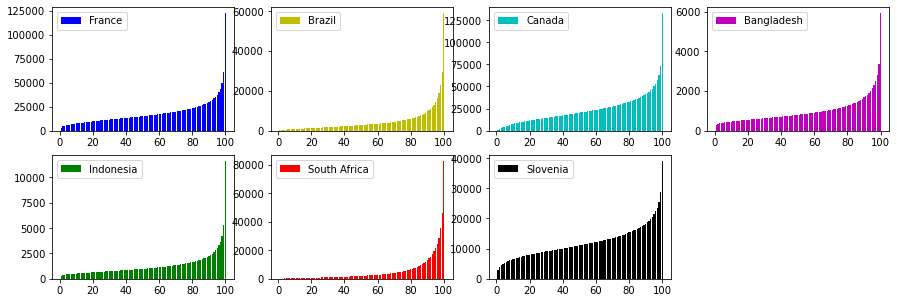

In [21]:
fig = plt.figure(figsize=(15,5))

# Visualisation de la diversités des revenus par quantiles.
for i,x in enumerate(countries):
    df = data[data.Country == x]
    the_country = df['Name'].iloc[0]
    ax = plt.subplot(2,4,i+1)
    plt.bar(df['Quantile'], df['Income'], label=the_country, color=colors[i])
    plt.legend()
plt.show()

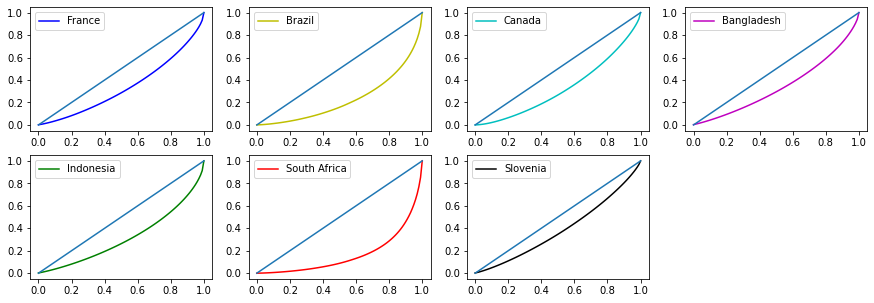

In [22]:
fig = plt.figure(figsize=(15,5))

# Visualisation de courbe de lorenz pour chaque pays.
for i,x in enumerate(countries):
    df = data[data.Country == x]
    the_country = df['Name'].iloc[0]
    ax = plt.subplot(2,4,i+1)
    lorenz = df['Income'].cumsum() / df['Income'].sum()
    #return np.insert(scaled_prefix_sum, 0, 0)
    
    plt.plot(np.linspace(0.0, 1.0, lorenz.size), lorenz, label=the_country, color=colors[i])
    plt.plot([0,1], [0,1])
    plt.legend()
    
plt.show()

#### Ajout des Indices de Gini

In [23]:
gini = pd.read_csv("/Users/teilo/Desktop/OC - Projet 7/predictions_revenus/Données/Indice_Gini.csv", on_bad_lines='skip')
gini = gini['Country Name;Country Code;2000;2001;2002;2003;2004;2005;2006;2007;2008'].str.split(";", n=10, expand=True)
gini = gini.rename(columns={0:"Name", 1:'Country', 2: 2000, 3: 2001, 4: 2002, 5: 2003, 6: 2004, 7: 2005, 8: 2006, 9: 2007, 10: 2008})
#gini = population.drop(columns=3)
gini

,Name,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,ABW,,,,,,,,,
1,Africa Eastern and Southern,AFE,,,,,,,,,
2,Afghanistan,AFG,,,,,,,,,
3,Africa Western and Central,AFW,,,,,,,,,
4,Angola,AGO,52,,,,,,,,42.7
...,...,...,...,...,...,...,...,...,...,...,...
248,Samoa,WSM,,,40.7,,,,,,42
249,Kosovo,XKX,,,,29,,31.2,30.3,,
250,South Africa,ZAF,57.8,,,,,64.8,,,63
251,Zambia,ZMB,,,42.1,,54.3,,54.6,,


In [24]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [25]:
ginis = pd.DataFrame(columns=['Country', 'gini'])

for country in data.Country.unique():
    df = data[data.Country == country]['Income'].copy()
    gini = gini_coefficient(df)
    
    new_row = {
        'Country': country,
        'gini': gini
    }
    
    ginis = ginis.append(new_row, ignore_index=True)

data = data.merge(ginis, how='left', on='Country')
display(data.head())

,Name,Country,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio,gini
0,Albania,ALB,2008,7297.0,2947314,0.047685,1,728.89795,299482.9902,0.002434,0.304624
1,Albania,ALB,2008,7297.0,2947314,0.047685,2,916.66235,299482.9902,0.003061,0.304624
2,Albania,ALB,2008,7297.0,2947314,0.047685,3,1010.91600,299482.9902,0.003376,0.304624
3,Albania,ALB,2008,7297.0,2947314,0.047685,4,1086.90780,299482.9902,0.003629,0.304624
4,Albania,ALB,2008,7297.0,2947314,0.047685,5,1132.69970,299482.9902,0.003782,0.304624


In [26]:
df = data.groupby('Name').mean()
print("L'indice de Gini moyen des pays est: ",df.gini.mean())

L'indice de Gini moyen des pays est:  0.37953604821151904


In [27]:
print("Les 5 pays avec l'indice de Gini le plus élevé sont:")
df.sort_values('gini', ascending=False).head(5)

Les 5 pays avec l'indice de Gini le plus élevé sont:


,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio,gini
Name,,,,,,,,,
South Africa,2008.0,9602.0,49779472.0,0.805390,50.5,5617.904880,561790.487963,0.01,0.669779
Honduras,2008.0,3628.0,7980955.0,0.129125,50.5,3296.268419,329626.841943,0.01,0.601667
Colombia,2008.0,8185.0,44254972.0,0.716008,50.5,3547.005276,354700.527550,0.01,0.569271
Guatemala,2011.0,4367.0,13739299.0,0.222290,50.5,2142.474753,214247.475251,0.01,0.568293
Central African Republic,2008.0,685.0,4273368.0,0.069139,50.5,811.299901,81129.990056,0.01,0.561732


In [28]:
print("Les 5 pays avec l'indice de Gini le plus faible sont:")
df.sort_values('gini', ascending=True).head(5)

Les 5 pays avec l'indice de Gini le plus faible sont:


,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio,gini
Name,,,,,,,,,
Slovenia,2008.0,27197.0,2021316.0,0.032703,50.5,12106.007475,1.210601e+06,0.01,0.230731
Slovak Republic,2008.0,20515.0,5379233.0,0.087031,50.5,6096.579894,6.096580e+05,0.01,0.247219
Czech Republic,2008.0,23223.0,10384603.0,0.168014,50.5,8235.293411,8.235293e+05,0.01,0.252864
Sweden,2008.0,34371.0,9219637.0,0.149166,50.5,16184.222707,1.618422e+06,0.01,0.254887
Ukraine,2008.0,6721.0,46258189.0,0.748418,50.5,3349.388306,3.349388e+05,0.01,0.255140


In [29]:
df = df.sort_values('gini', ascending=True).reset_index()
print("La France est positionné : 38e")
df.loc[df['Name'] == 'France']

La France est positionné : 38e


,Name,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio,gini
38,France,2008.0,30357.0,64374979.0,1.041533,50.5,18309.407545,1.830941e+06,0.01,0.329096


## Mission 3
Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :
- mj : le revenu moyen du pays
- Gj: l'indice de Gini du pays

Il nous manque donc, pour un individu , la classe de revenu de ses parents(Cparent).

Calcul du coefficient d'élasticité (rho), mesurant une corrélation entre le revenu de l'individu et le revenu de ses parents. Il mesure la mobilité intergénérationnelle du revenu.
1. Générez un grand nombre de réalisations d'une variable selon une loi normale.
2. Générez n réalisations du terme d'erreur selon une loi normale de moyenne 0 et d'écart-type.
3. Pour une valeur donnée de pj(par ex 0.9), calculer Ychild. A ce stade, Ychild ne reflete pas la réalité mais cela n'a pas d'influence pour la suite.
4. Pour chaque n individus générés, calculez la classe de revenu pour chaque Cchild ainsi que que celle de ces parents Cparents, à partir de Ychild et Yparent.
5. Estimer pour chaque Cchild la distribution conditionnelle de Cparent.
6. Créer un graphique représentatn ces distributions conditionnelle.
7. Effacer individus précedemment générés mais garder distributions conditionnelles.
8. Pour chaque individus de la WID, créez 499 "clones". 
9. Pour chaque Cchild et chaque pays, il y maintenant 500 individus. Attribuer à chaque individus leurs clases Cparent conformément aux distributions trouvées précedemment.
10. Effacer la variable Cchild.
11. S'assurer que le nouvel échantillon contient les variables: mj et Gj.

### Ajout du coefficient d'élasticité (IGE) 

In [30]:
ige = pd.read_csv('/Users/teilo/Desktop/OC - Projet 7/predictions_revenus/Données/GDIMMay2018+(1).csv')[['iso3', 'IGEincome']]
ige = ige.dropna().drop_duplicates()
ige = ige.rename(columns={'iso3': 'Country', "IGEincome": 'pj'})
ige.head(3)

,Country,pj
60,ALB,0.815874
183,AUS,0.275000
243,AUT,0.245267


In [31]:
data = data.merge(ige, how='left', on='Country')
data

,Name,Country,Year,GDP,Population,%_pop_total,Quantile,Income,income_total,income_ratio,gini,pj
0,Albania,ALB,2008,7297.00000,2947314,0.047685,1,728.89795,299482.990200,0.002434,0.304624,0.815874
1,Albania,ALB,2008,7297.00000,2947314,0.047685,2,916.66235,299482.990200,0.003061,0.304624,0.815874
2,Albania,ALB,2008,7297.00000,2947314,0.047685,3,1010.91600,299482.990200,0.003376,0.304624,0.815874
3,Albania,ALB,2008,7297.00000,2947314,0.047685,4,1086.90780,299482.990200,0.003629,0.304624,0.815874
4,Albania,ALB,2008,7297.00000,2947314,0.047685,5,1132.69970,299482.990200,0.003782,0.304624,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Congo,COD,2008,303.19305,60411195,0.977402,96,810.62330,27601.604415,0.029369,0.443997,0.707703
11495,Congo,COD,2008,303.19305,60411195,0.977402,97,911.78340,27601.604415,0.033034,0.443997,0.707703
11496,Congo,COD,2008,303.19305,60411195,0.977402,98,1057.80740,27601.604415,0.038324,0.443997,0.707703
11497,Congo,COD,2008,303.19305,60411195,0.977402,99,1286.60290,27601.604415,0.046613,0.443997,0.707703


### Code pour 1. -> 6.

In [32]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
#plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))

[[0.233 0.135 0.08  ... 0.    0.    0.   ]
 [0.112 0.09  0.068 ... 0.    0.    0.   ]
 [0.084 0.076 0.072 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.071 0.07  0.091]
 [0.    0.    0.    ... 0.077 0.081 0.128]
 [0.    0.    0.    ... 0.095 0.13  0.23 ]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.025


In [33]:
pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
#plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))

[[0.233 0.118 0.09  ... 0.    0.    0.   ]
 [0.135 0.104 0.066 ... 0.    0.    0.   ]
 [0.08  0.074 0.058 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.068 0.073 0.098]
 [0.    0.    0.    ... 0.065 0.085 0.118]
 [0.    0.    0.    ... 0.087 0.111 0.242]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.022


### Mise en place dans dataframe

In [36]:
%%time

# Parent / Child generated dataframe
columns=['country', 'ln_yparent', 'epsilone', 'pj', 'ychild', 'cparent', 'cchild']
parent_child = pd.DataFrame(columns=columns)

# Number of generated units
n = 1000 * 100

# Compute ychild
def ychild(row):    
    return np.exp(row['pj'] * row['ln_yparent'] + row['epsilone'])

# Main loop
for the_country in data.Country.drop_duplicates():

    # Get the IGM Coeff
    the_pj = data[data.Country == the_country]['pj'].iloc[0]

    # Generate values
    s1 = pd.Series(np.random.normal(size=n))
    s1.name = "ln_yparent"
    s2 = pd.Series(np.random.normal(size=n))
    s2.name = "epsilone"
    # Concatenate
    temp_df = pd.concat([s1, s2], axis=1)
    temp_df['pj'] = the_pj
    temp_df['ychild'] = temp_df.apply(ychild, axis=1)

    # Compute cparent
    percentiles = np.argsort(np.argsort(temp_df['ln_yparent'])) * 100. / (len(temp_df['ln_yparent']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cparent'] = percentiles

    # Compute cchild
    percentiles = np.argsort(np.argsort(temp_df['ychild'])) * 100. / (len(temp_df['ychild']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cchild'] = percentiles

    # Add the country
    temp_df['country'] = the_country

    # Append to the main df
    parent_child = parent_child.append(temp_df, sort=False)

# Display the result
display(parent_child.shape)
display(parent_child.head())

(11500000, 7)

,country,ln_yparent,epsilone,pj,ychild,cparent,cchild
0,ALB,-1.765418,-1.113575,0.815874,0.077775,4,3
1,ALB,1.876955,0.554571,0.815874,8.052085,97,95
2,ALB,-0.341134,-0.504812,0.815874,0.456971,37,28
3,ALB,0.625184,-0.127542,0.815874,1.465989,74,62
4,ALB,-0.611562,-0.456708,0.815874,0.384556,27,24


CPU times: user 3min 9s, sys: 18.6 s, total: 3min 28s
Wall time: 3min 37s


In [37]:
%%time

df_prob = {
    'country':[],
    'c_child':[],
    'c_parent':[],
    'prob':[]
}

for the_country in data['Country'].drop_duplicates():
    
    df = parent_child[parent_child.country == the_country]
    len_total = len(df)

    for c_child in range(1,101):
        
        # Probabilité d'avoir cette classe d'enfant
        this_child = df[df['cchild'] == c_child]
        child_prob = len(this_child) / len_total

        for c_parent in range(1,101):
            
            # Probabilité d'avoir cette classe d'enfant ET cette classe de parent
            this_prob = len(this_child[this_child['cparent'] == c_parent]) / len_total

            # Probabilité d'avoir cette classe de parent sachant la classe de l'enfant
            cond_prob = this_prob / child_prob    

            # On rajoute la probabilité conditionnelle dans le dataframe
            df_prob['country'].append(the_country)
            df_prob['c_child'].append(c_child)
            df_prob['c_parent'].append(c_parent)
            df_prob['prob'].append(cond_prob)
            
df_prob = pd.DataFrame(df_prob)

display(df_prob.shape)
display(df_prob.head())

(1150000, 4)

,country,c_child,c_parent,prob
0,ALB,1,1,0.218218
1,ALB,1,2,0.104104
2,ALB,1,3,0.077077
3,ALB,1,4,0.066066
4,ALB,1,5,0.051051


CPU times: user 7min 15s, sys: 5.11 s, total: 7min 20s
Wall time: 7min 40s


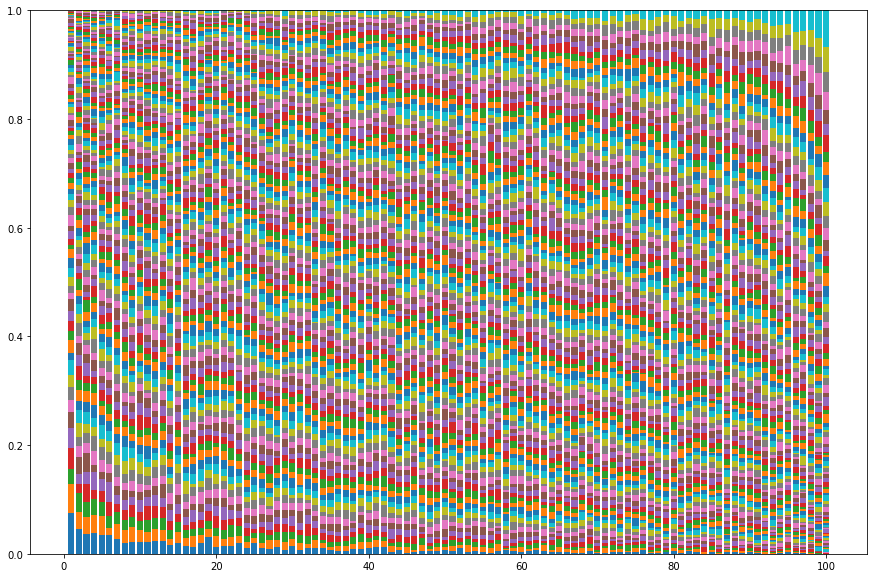

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
bottom = pd.Series(np.zeros(100))
df_fra = df_prob[df_prob.country == 'FRA']

for i in range(1,101):
    data = df_fra[df_fra.c_parent == i].sort_values(by='c_child')
    plt.bar(data['c_child'], data['prob'], bottom=bottom, zorder=2,label=i)
    bottom = bottom + data['prob'].reset_index(drop=True)
    
plt.show()

In [39]:
%%time

final_df = {
    'country':[],
    'country_full':[],
    'quantile':[],
    'c_parent':[],
    'population':[],
    'gini':[],
    'income_avg':[],
    'income':[],
}

# Row
for i in range(0,len(data)):
    row = data.iloc[i]
    df = df_prob[df_prob['country'] == row['country']]
    df = df[df['c_child'] == row['Quantile']]
    
    # Parent
    for j in range(1,101):
        
        # Number of parents
        n = int(round(df[df['c_parent'] == j]['prob'].iloc[0] * 500))
        
        # Copy the values n times
        final_df['country'].extend([row['country']]*n)
        final_df['country_full'].extend([row['country_full']]*n)
        final_df['quantile'].extend([row['Quantile']]*n)
        final_df['income'].extend([row['Income']]*n)
        final_df['population'].extend([row['Population']]*n)
        final_df['gini'].extend([row['gini']]*n)
        final_df['c_parent'].extend([j]*n)
        
final_df = pd.DataFrame(final_df)
display(final_df.shape)
display(final_df.head())

KeyError: 'Quantile'